# `20180811a` - Checking Kretz probe - client

In [63]:
#!/usr/bin/python
import spidev
import RPi.GPIO as GPIO
import time
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import json
import time
from pyUn0 import *

## Setup

![](P_20180811_190929.jpg)

In [74]:
# Taggin this image accordingly
r = TagImage("P_20180811_190929.jpg","kretzaw145ba",x.iD,"setup","Connection of plugs to test")

## Actions

Testing on the 3 coax cables there are in the head

data/20180811a5.json


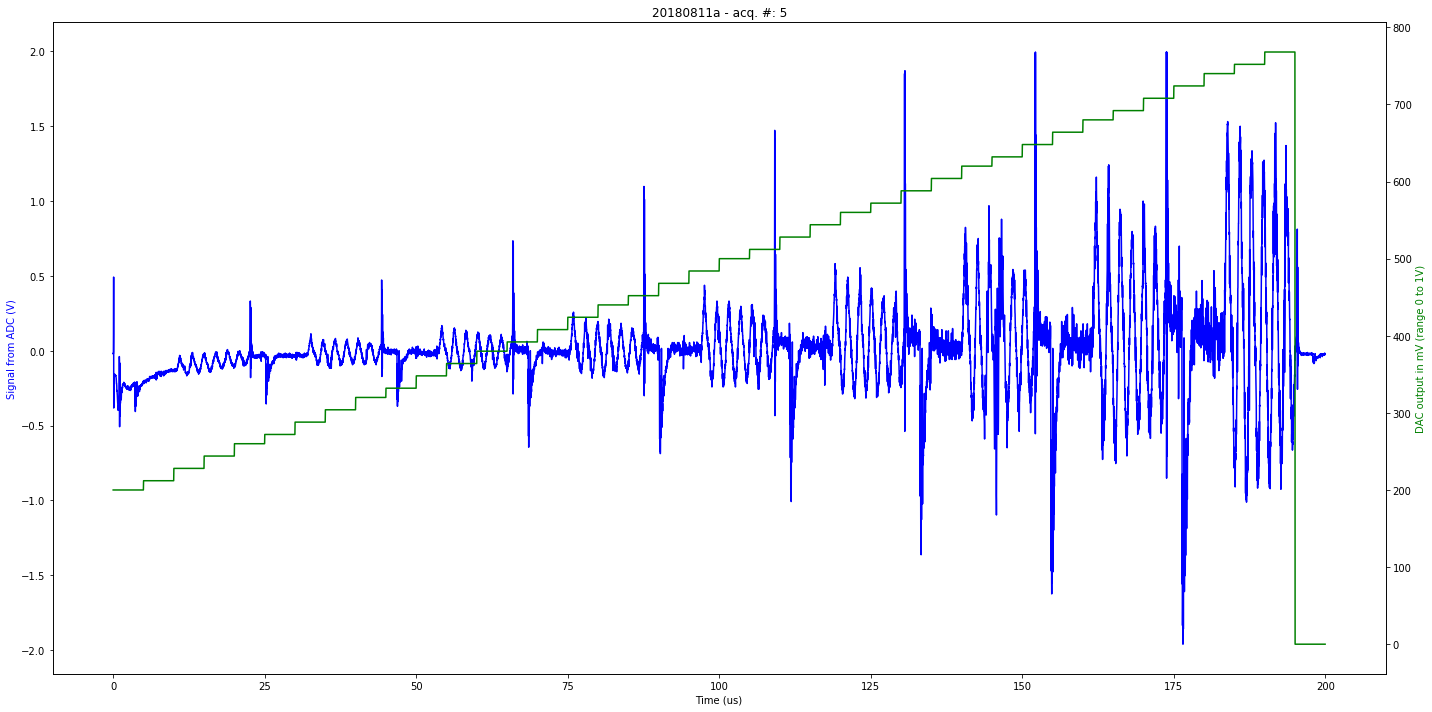

1
data/20180811a6.json


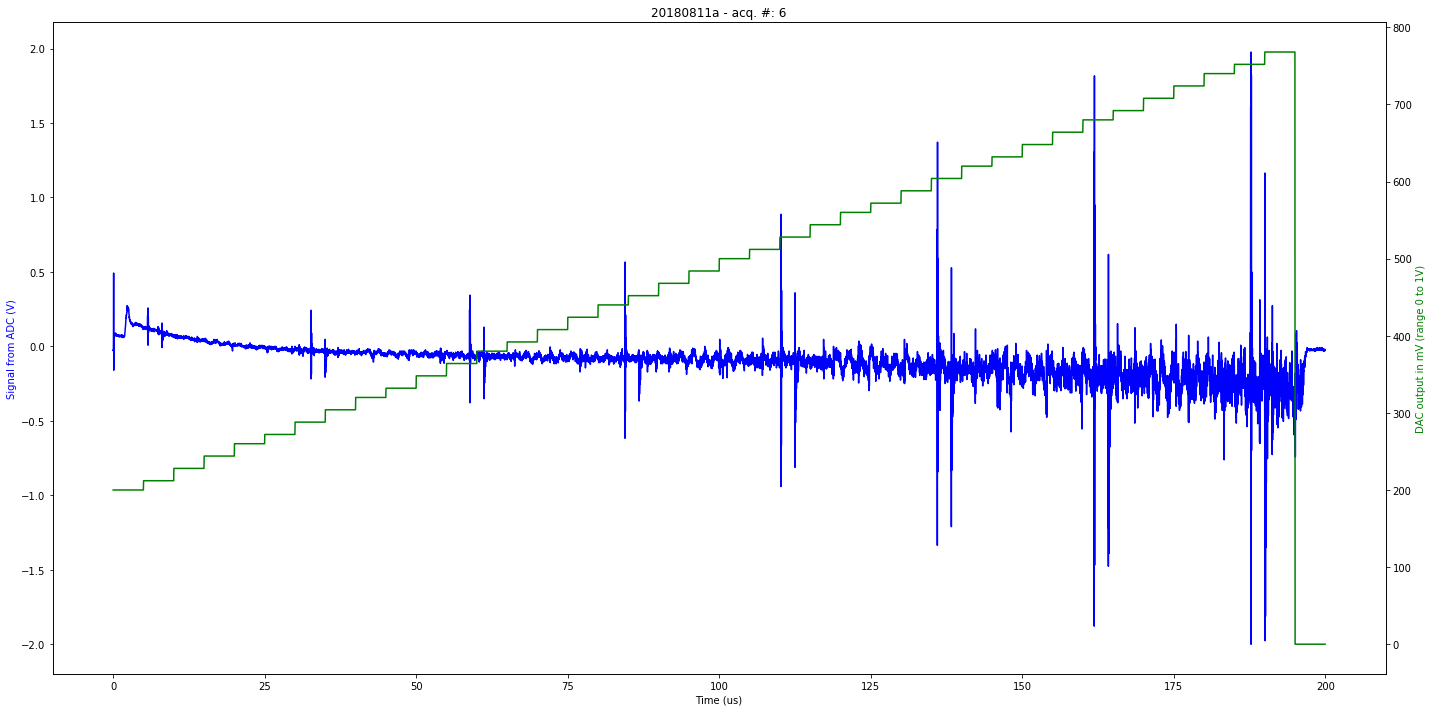

1
data/20180811a4.json


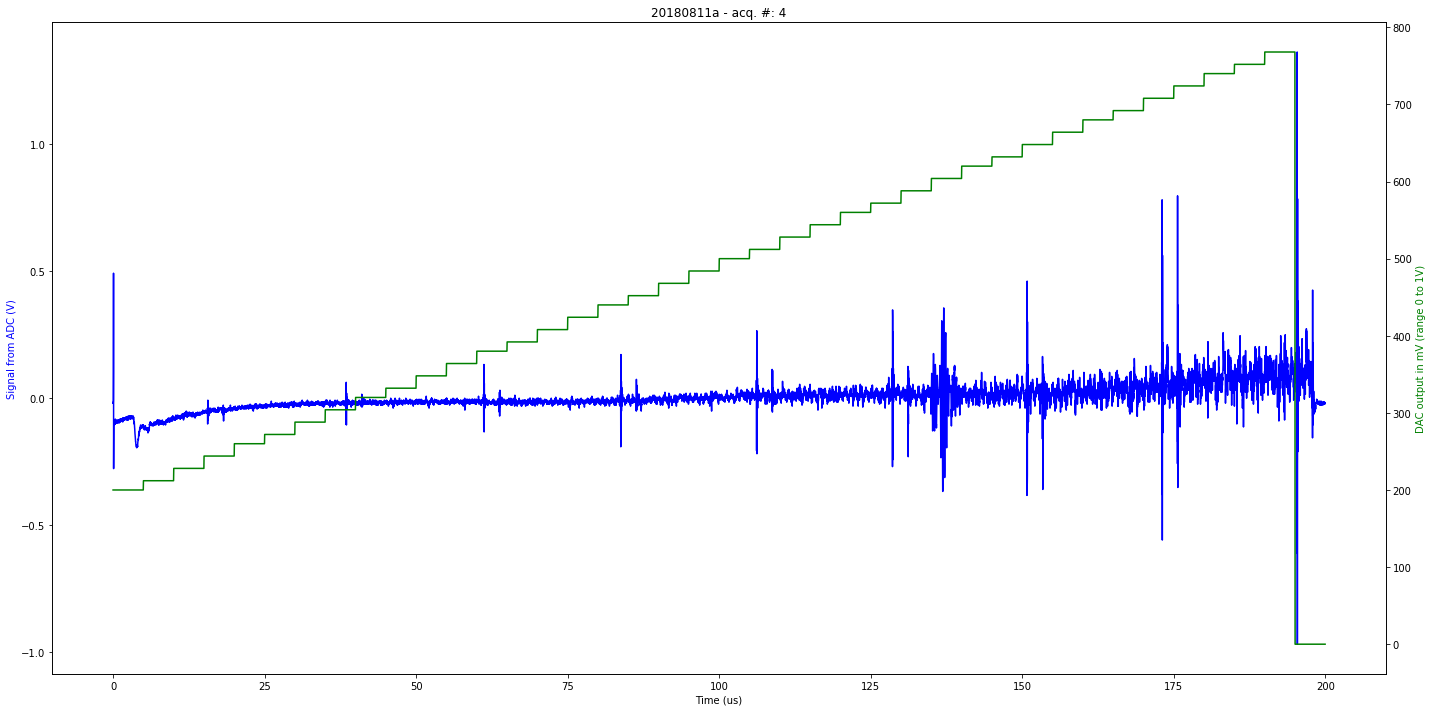

1
data/20180811a7.json


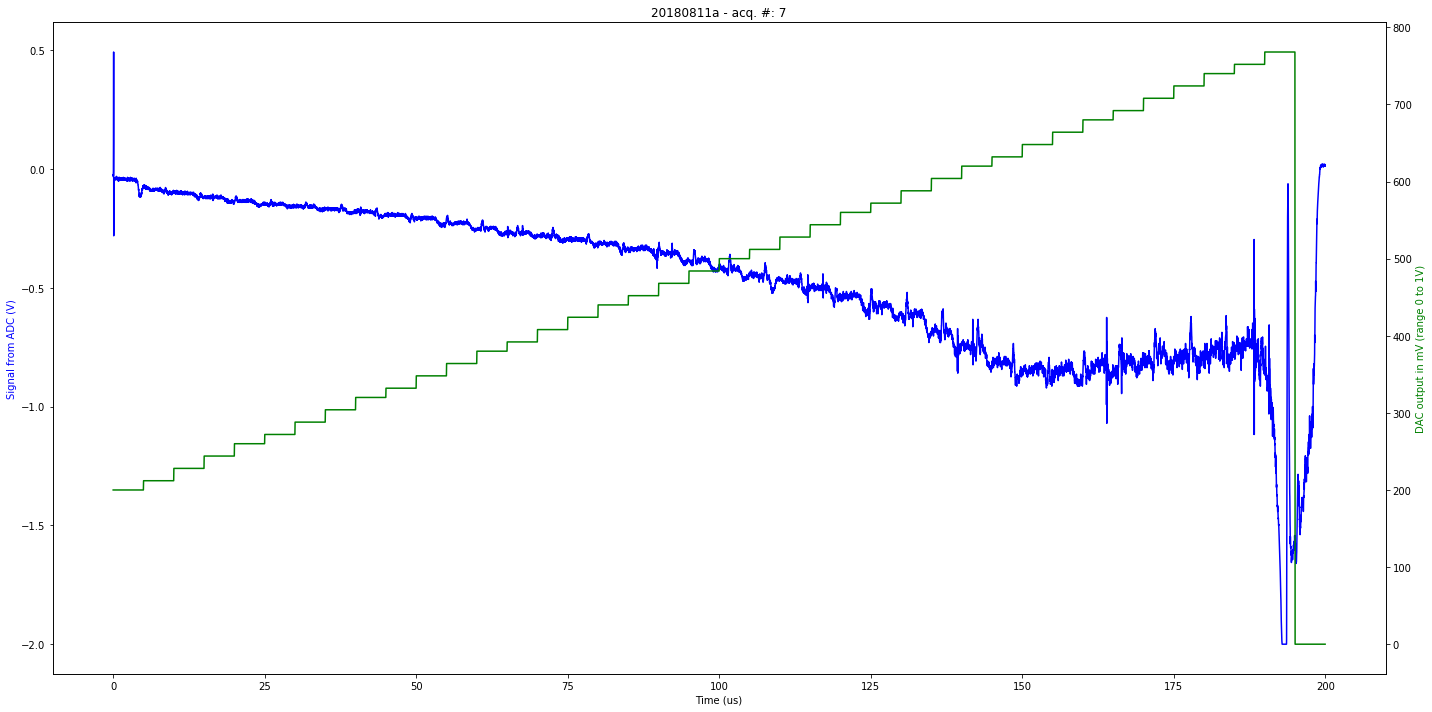

1
data/20180811a2.json


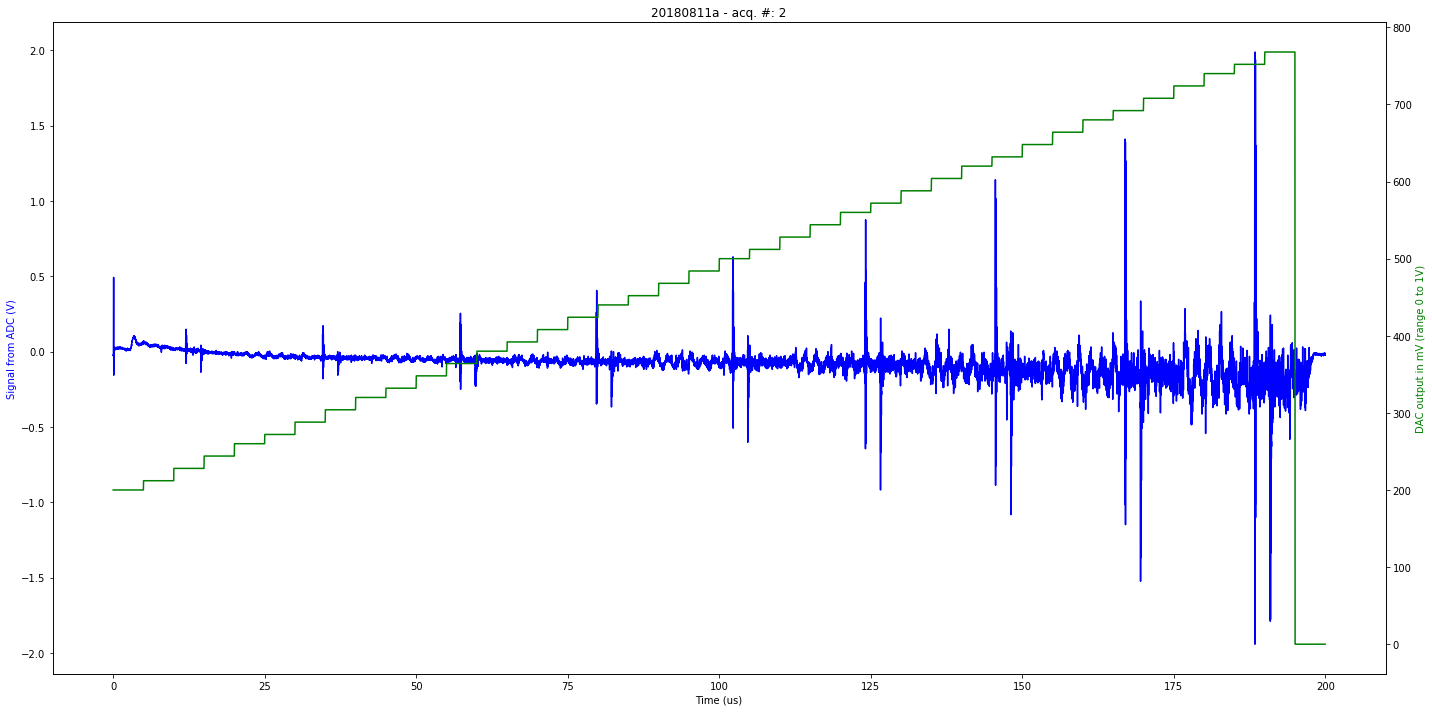

1
data/20180811a3.json


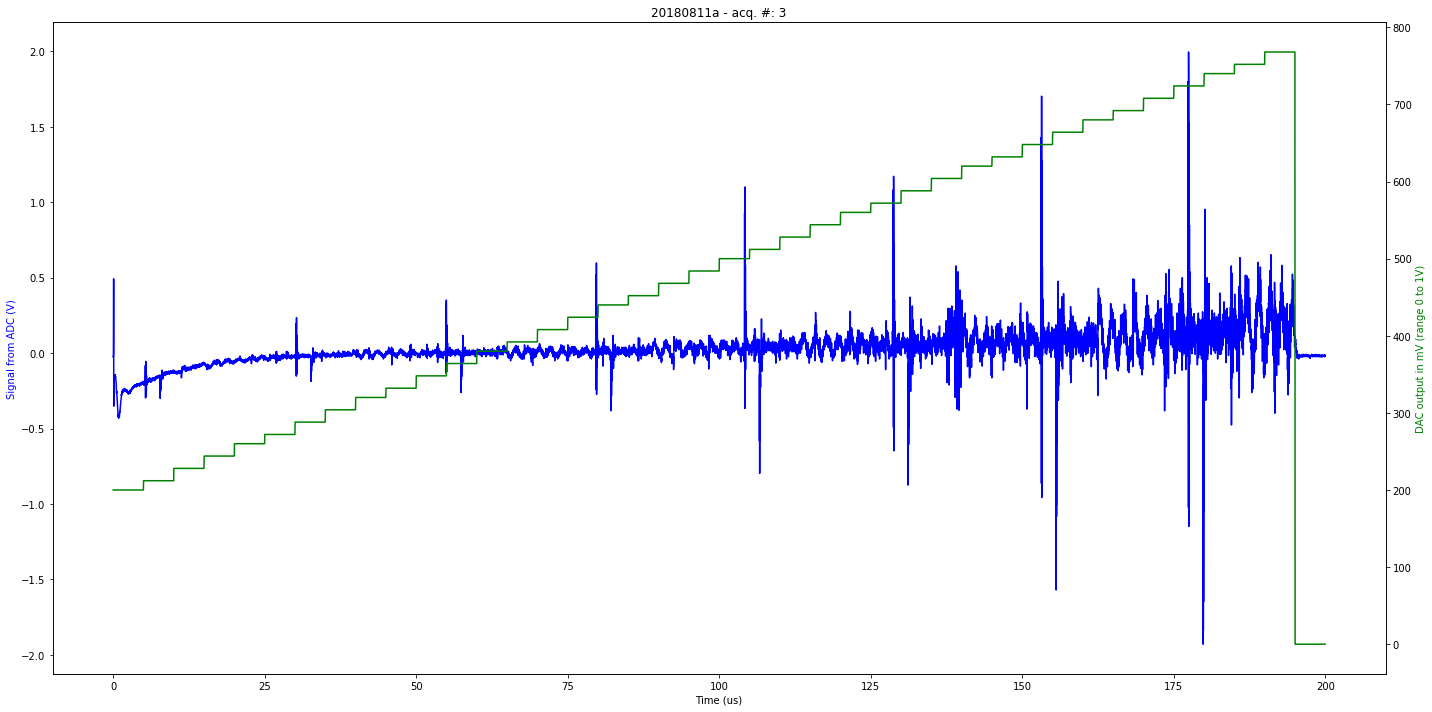

1
data/20180811a1.json


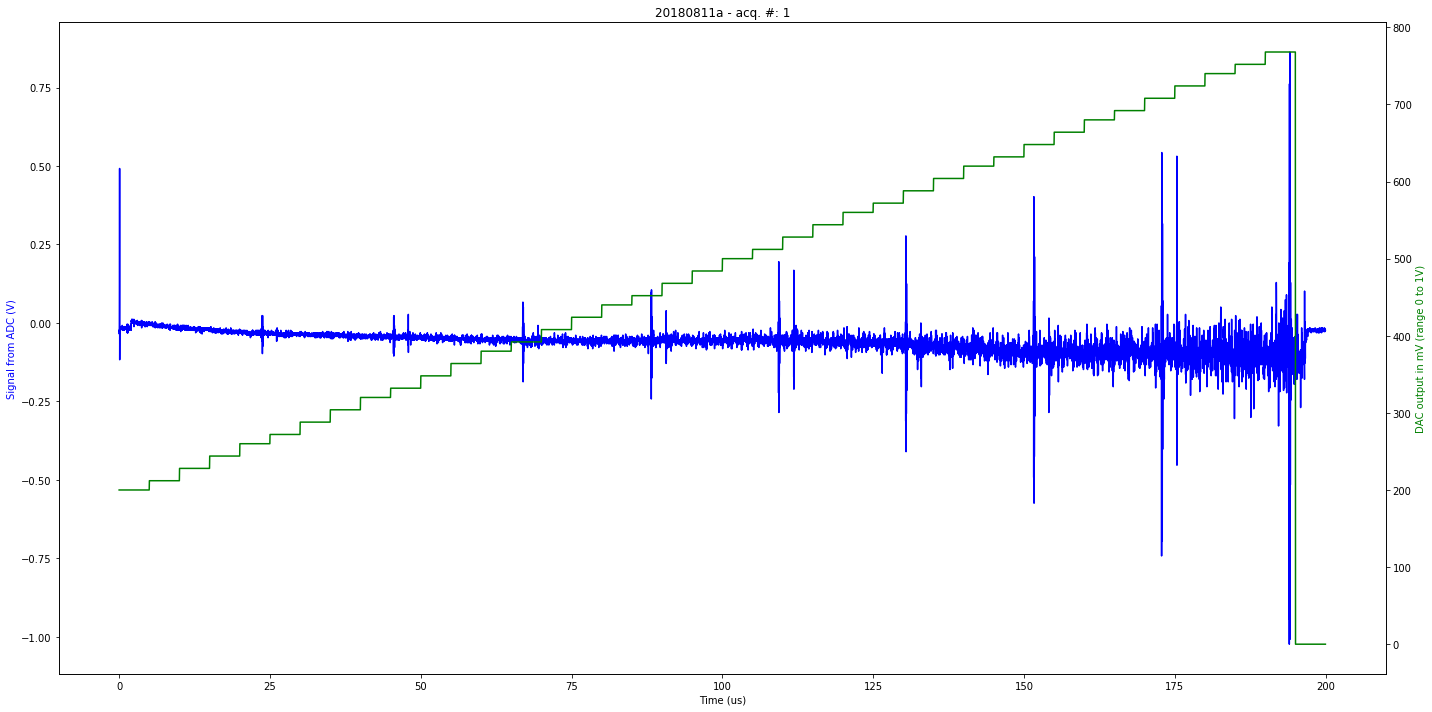

1


In [64]:
for data in glob.glob("data/*.json"):
    print data
    x = us_json()
    x.JSONprocessing(data)
    x.mkImg()
    #x.PlotDetail(0,100,125)
    #x.SaveNPZ()
    print x.Nacq

# Checking data

Setup: the probe was in water, piezo facing bottom of glass, at around 10cm

It seems only the data files 3 and 4 have a signal corresponding to this distance.

In [65]:
x = us_json()
x.JSONprocessing("data/20180811a3.json")
y = us_json()
y.JSONprocessing("data/20180811a4.json")

### Checking  lines between 130 and 150 us

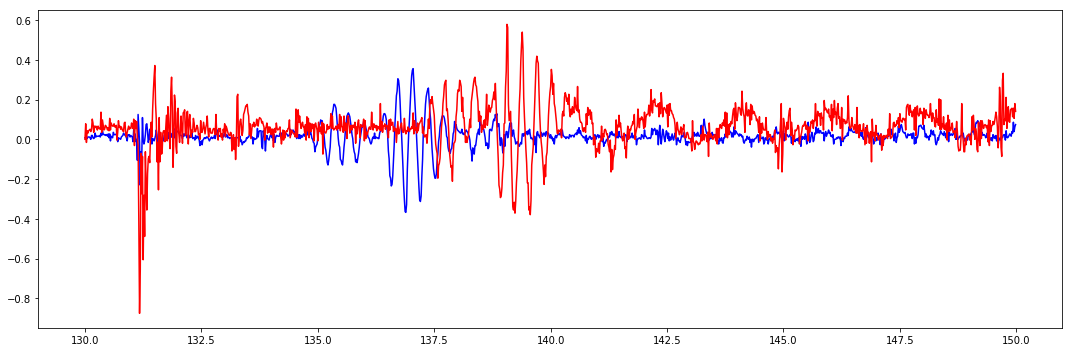

1

In [66]:
A = 130
B = 150
plt.figure(figsize=(15,5))
plt.plot(y.t[64*A:64*B],y.tmp[64*A:64*B],"b") 
plt.plot(x.t[64*A:64*B],x.tmp[64*A:64*B],"r")

plt.tight_layout()
FileName = x.iD+"-"+str(x.N)+"first-lines-rawsignal.jpg"
plt.savefig(FileName)
plt.show()
TagImage(FileName,"kretzaw145ba",x.iD,"lines",y.description)

## Filtering

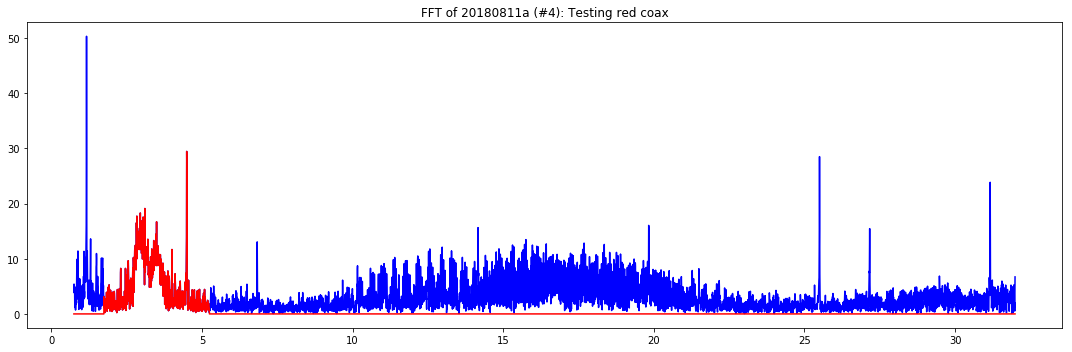

1

In [67]:
plt.figure(figsize=(15,5))
plt.plot(y.FFT_x[150:y.len_line/2],np.abs(y.FFT_y[150:y.len_line/2]),"b") 
plt.plot(y.FFT_x[150:x.len_line/2],np.abs(y.FFT_filtered[150:x.len_line/2]),"r")
plt.title ("FFT of "+y.iD +" (#"+str(y.N)+"): " +y.description)

plt.tight_layout()
FileName = x.iD+"-"+str(x.N)+"first-lines-fft.jpg"
plt.savefig(FileName)
plt.show()
TagImage(FileName,"kretzaw145ba",x.iD,"fft",y.description)

## Let's see, once filtered around 3.5MHz

Lets see if we see anything..

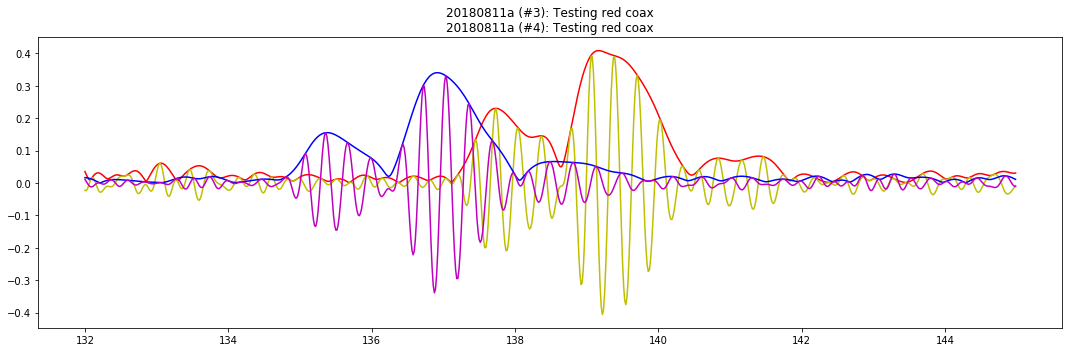

1

In [68]:
A = 132
B = 145
plt.figure(figsize=(15,5))
plt.plot(x.t[64*A:64*B],x.EnvHil[64*A:64*B],"r")
plt.plot(x.t[64*A:64*B],x.SignalFiltered[64*A:64*B]+1/2,"y") 
plt.plot(y.t[64*A:64*B],y.EnvHil[64*A:64*B],"b") 
plt.plot(y.t[64*A:64*B],y.SignalFiltered[64*A:64*B],"m") 
plt.title (  x.iD +" (#"+str(x.N)+"): " + x.description +"\n"+y.iD +" (#"+str(y.N)+"): " +y.description)

plt.tight_layout()
FileName = x.iD+"-"+str(x.N)+"first-lines.jpg"
plt.savefig(FileName)
plt.show()
TagImage(FileName,"kretzaw145ba",x.iD,"lines",y.description)

# Cheatsheet: keys for us_json instances

In [69]:
x.__dict__.keys()

['IDLine',
 'FFT_x',
 'FFT_y',
 'single',
 'experiment',
 'piezo',
 'FFT_filtered',
 'processed',
 'tmp',
 'parameters',
 'len_line',
 'LengthT',
 'Nacq',
 'iD',
 't',
 'description',
 'TT2',
 'TT1',
 'EnvHil',
 'N',
 'V',
 'len_acq',
 'firmware_md5',
 'f',
 'Registers',
 'SignalFiltered',
 'tdac']